In [1]:
#Import libraries
import io
import math
import time
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
#upload dataset
from google.colab import files
uploaded1 = files.upload()

Saving lap1.csv to lap1.csv


In [3]:
#cleansing
hhnb= pd.read_csv(io.BytesIO(uploaded1['lap1.csv']))
hhnb=hhnb.dropna()
hhnb.isnull().sum()

#                         0
Time in Sec               0
Time in usec              0
 Bytes sent               0
Sender latitude           0
Sender longitude          0
 Sender Speed(km/h)       0
Sender Altitude(m)        0
 Receiver latitude        0
 Receiver Longitude       0
 Receiver Speed           0
Receiver Altitude(m)      0
 Packet Received (Y/N)    0
 Bytes Received           0
 Signal Strength          0
 Noise Strength           0
dtype: int64

In [4]:
hhnb.columns

Index(['#', 'Time in Sec', 'Time in usec', ' Bytes sent', 'Sender latitude',
       'Sender longitude', ' Sender Speed(km/h)', 'Sender Altitude(m)',
       ' Receiver latitude', ' Receiver Longitude', ' Receiver Speed',
       'Receiver Altitude(m)', ' Packet Received (Y/N)', ' Bytes Received',
       ' Signal Strength', ' Noise Strength'],
      dtype='object')

In [5]:
column_names=hhnb.columns
for i in column_names:
    print(hhnb[i].dtype)

int64
int64
int64
int64
object
object
float64
float64
object
object
float64
float64
object
int64
int64
int64


In [6]:
binary_mapping = {'N': 0 ,'Y': 1}
hhnb[' Packet Received (Y/N)'] = hhnb[' Packet Received (Y/N)'].map(binary_mapping)
sample=hhnb.loc[30000:40000, [' Packet Received (Y/N)',' Noise Strength',' Signal Strength']]
sample=pd.DataFrame(sample)

In [7]:
degree_latitude_sender=list(hhnb['Sender latitude'])
degree_latitude_receiver=list(hhnb[' Receiver latitude'])
degree_longtitude_sender=list(hhnb['Sender longitude'])
degree_longtitude_receiver=list(hhnb[' Receiver Longitude'])
cm_latitude_sender=[]
cm_latitude_receiver=[]
cm_longtitude_sender=[]
cm_longtitude_receiver=[]
for i in degree_latitude_sender:
    cm_latitude_sender.append(364000*float(i[:-1])*30.48)
for i in degree_latitude_receiver:
    cm_latitude_receiver.append(364000*float(i[:-1])*30.48)
for i in degree_longtitude_sender:
    cm_longtitude_sender.append(288200*float(i[:-1])*30.48)
for i in degree_longtitude_receiver:
    cm_longtitude_receiver.append(288200*float(i[:-1])*30.48)
distant_lat=[]
distant_long=[]
distant_alt=[]
for i in range(len(cm_latitude_sender)):
    distant_lat.append(abs(cm_latitude_sender[i]-cm_latitude_receiver[i]))
    distant_long.append(abs(cm_longtitude_sender[i]-cm_longtitude_receiver[i]))
    distant_alt.append(abs(hhnb['Sender Altitude(m)'][i]-hhnb['Receiver Altitude(m)'][i]))
sample['distance_lat']=distant_lat[30000:40001]
sample['distance_long']=distant_long[30000:40001]
sample['distance_alt']=distant_alt[30000:40001]

In [8]:
features=sample.drop([' Packet Received (Y/N)'], axis=1)
target=sample[' Packet Received (Y/N)']
x_train, x_test,y_train, y_test = train_test_split(features,target,test_size = 0.2)

In [9]:
#scaling
sc = StandardScaler()
x_trains=sc.fit_transform(x_train)
x_tests=sc.transform(x_test)

In [14]:
#creat SVM model and it's prediction
modelsvm = svm.SVC(kernel ='poly', degree = 5)
start = time.time()
modelsvm.fit(x_train,y_train)
end = time.time()
total_time_SVM = end - start
print("Time for fitting svm:   "+ str(total_time_SVM))
predictionssvm = modelsvm.predict(x_test)
print('Accuracy Score SVM : %.3f' % accuracy_score(y_test, predictionssvm))
print('Precision SVM : %.3f' % precision_score(y_test, predictionssvm))
print('Recall SVM : %.3f' % recall_score(y_test, predictionssvm))
print('F1 Score SVM : %.3f' % f1_score(y_test, predictionssvm))
probs_svm=modelsvm.decision_function(x_test)

Time for fitting svm:   1.7497611045837402
Accuracy Score SVM : 0.922
Precision SVM : 0.932
Recall SVM : 0.940
F1 Score SVM : 0.936


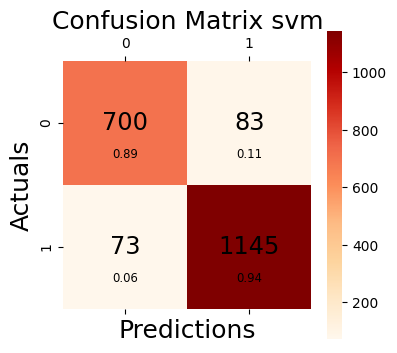

In [15]:
#confusion matrix for SVM
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictionssvm)
fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j+0.5, y=i+0.5,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        ax.text(x=j+0.5, y=i+0.75,s=round(conf_matrix[i, j]/(conf_matrix[i,0]+conf_matrix[i,1]),2), va='center', ha='center', size='small')
sb.heatmap(conf_matrix , cmap="OrRd")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix svm', fontsize=18)
plt.show()

In [16]:
print(classification_report(y_test, predictionssvm))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       783
           1       0.93      0.94      0.94      1218

    accuracy                           0.92      2001
   macro avg       0.92      0.92      0.92      2001
weighted avg       0.92      0.92      0.92      2001



In [21]:
#creat KNN model and it's predictions
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50,metric='minkowski',p=2)
start = time.time()
knn.fit(x_train,y_train)
end = time.time()
total_time_KNN = end - start
print("Time for fitting knn:   "+ str(total_time_KNN))
predictionknn=knn.predict(x_test)
probs_knn=knn.predict_proba(x_test)[:,1]
print('Accuracy Score KNN: %.3f' % accuracy_score(y_test, predictionknn))
print('Precision KNN : %.3f' % precision_score(y_test, predictionknn))
print('Recall KNN : %.3f' % recall_score(y_test, predictionknn))
print('F1 Score KNN : %.3f' % f1_score(y_test, predictionknn))

Time for fitting knn:   0.8228028297424317
Accuracy Score KNN: 0.970
Precision KNN : 0.971
Recall KNN : 0.979
F1 Score KNN : 0.975


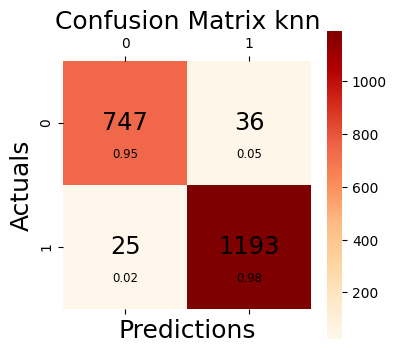

In [22]:
#Confusion matrix for KNN
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictionknn)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j+0.5, y=i+0.5,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        ax.text(x=j+0.5, y=i+0.75,s=round(conf_matrix[i, j]/(conf_matrix[i,0]+conf_matrix[i,1]),2), va='center', ha='center', size='small')
sb.heatmap(conf_matrix , cmap="OrRd")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix knn', fontsize=18)
plt.show()

In [23]:
print(classification_report(y_test, predictionknn))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       783
           1       0.97      0.98      0.98      1218

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



In [25]:
#creat random forest model and it's predictions
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5)
start = time.time()
forest.fit(x_train, y_train)
end = time.time()
total_time_RF = end - start
print("Time for fitting RF:   "+ str(total_time_RF))
predictionRF = forest.predict(x_test)
probs_RF=forest.predict_proba(x_test)[:,1]
print('Accuracy Score RF: %.3f' % accuracy_score(y_test, predictionRF))
print('Precision RF : %.3f' % precision_score(y_test, predictionRF))
print('Recall RF : %.3f' % recall_score(y_test, predictionRF))
print('F1 Score RF : %.3f' % f1_score(y_test, predictionRF))

Time for fitting RF:   0.15180954933166504
Accuracy Score RF: 1.000
Precision RF : 1.000
Recall RF : 1.000
F1 Score RF : 1.000


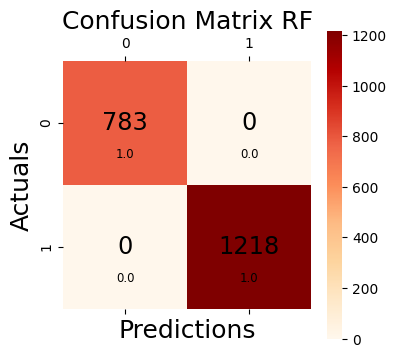

In [26]:
#confusion matrix for random forest
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictionRF)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j+0.5, y=i+0.5,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        ax.text(x=j+0.5, y=i+0.75,s=round(conf_matrix[i, j]/(conf_matrix[i,0]+conf_matrix[i,1]),2), va='center', ha='center', size='small')
sb.heatmap(conf_matrix , cmap="OrRd")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix RF', fontsize=18)
plt.show()

In [27]:
print(classification_report(y_test, predictionRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00      1218

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



In [30]:
x=sample.drop([' Signal Strength',' Noise Strength'],axis=1)
y=sample[' Packet Received (Y/N)']
x_train, x_test,y_train, y_test2 = train_test_split(x,y,test_size = 0.2)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
start = time.time()
nb.fit(x_train, y_train)
end = time.time()
total_time_NB = end - start
print("Time for fitting NB:   "+ str(total_time_NB))
predictionNB=nb.predict(x_test)
probs_nb=nb.predict_proba(x_test)[:,1]
print('Accuracy Score nb: %.3f' % accuracy_score(y_test2, predictionNB))
print('Precision nb : %.3f' % precision_score(y_test2, predictionNB))
print('Recall nb: %.3f' % recall_score(y_test2, predictionNB))
print('F1 Score nb : %.3f' % f1_score(y_test2, predictionNB))

Time for fitting NB:   0.6057370662689209
Accuracy Score nb: 0.940
Precision nb : 0.966
Recall nb: 0.933
F1 Score nb : 0.949


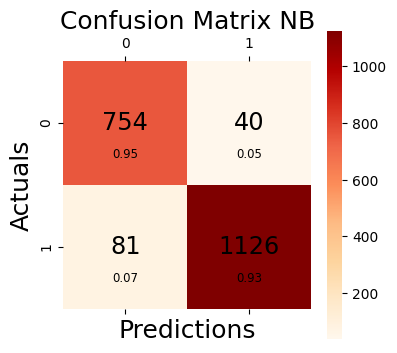

In [31]:
#confusion matrix for Naive Bayes
conf_matrix = confusion_matrix(y_true=y_test2, y_pred=predictionNB)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j+0.5, y=i+0.5,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        ax.text(x=j+0.5, y=i+0.75,s=round(conf_matrix[i, j]/(conf_matrix[i,0]+conf_matrix[i,1]),2), va='center', ha='center', size='small')
sb.heatmap(conf_matrix , cmap="OrRd")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix NB', fontsize=18)
plt.show()

In [32]:
print(classification_report(y_test2,predictionNB ))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       794
           1       0.97      0.93      0.95      1207

    accuracy                           0.94      2001
   macro avg       0.93      0.94      0.94      2001
weighted avg       0.94      0.94      0.94      2001



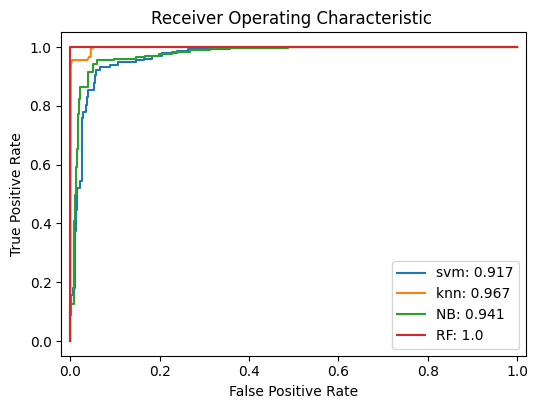

In [48]:
#plotting ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test,probs_svm)
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test,probs_knn)
false_positive_rate3, true_positive_rate3, threshold1 =roc_curve(y_test2,probs_nb)
false_positive_rate4, true_positive_rate4, threshold1 =roc_curve(y_test,probs_RF)
plt.subplots(1, figsize=(6,4.2))
plt.title('Receiver Operating Characteristic ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot(false_positive_rate4, true_positive_rate4)
plt.xlim([-0.02,1.02])
plt.legend(['svm: '+str(round(roc_auc_score(y_test, predictionssvm),3)),'knn: '+str(round(roc_auc_score(y_test, predictionknn),3)),'NB: '+str(round(roc_auc_score(y_test2, predictionNB),3)),'RF: '+str(round(roc_auc_score(y_test, predictionRF),3))])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
print('total_time_RF: %.3f'%round(total_time_RF,3))
print('total_time_NB: %.3f'%round(total_time_NB,3))
print('total_time_kNN: %.3f'%round(total_time_KNN,3))
print('total_time_svm: %.3f'%round(total_time_SVM,3))

total_time_RF: 0.152
total_time_NB: 0.606
total_time_kNN: 0.823
total_time_svm: 1.750


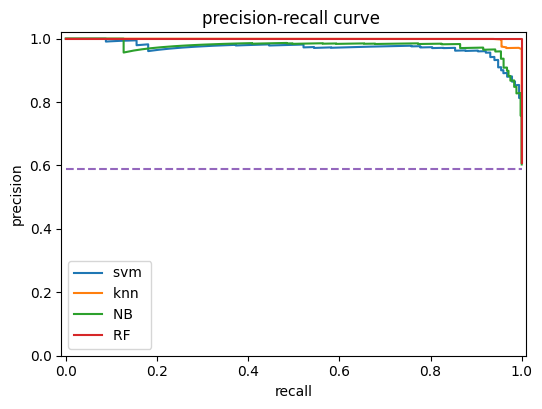

In [52]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision1, recall1, _ = precision_recall_curve(y_test,probs_svm)
precision2, recall2, _ = precision_recall_curve(y_test,probs_knn)
precision3, recall3, _ = precision_recall_curve(y_test2,probs_nb)
precision4, recall4, _ = precision_recall_curve(y_test,probs_RF)
plt.subplots(1, figsize=(6,4.2))
plt.title('precision-recall curve ')
plt.plot(recall1, precision1)
plt.plot(recall2, precision2)
plt.plot(recall3, precision3)
plt.plot(recall4, precision4)
plt.ylim([0,1.02])
plt.xlim([-0.01,1.01])
plt.plot([0.59, 0.59], ls="--")
plt.legend(['svm ','knn ','NB ','RF '])
plt.ylabel('precision')
plt.xlabel('recall')
plt.show()